In [1]:
!pip install pyspark py4j

In [2]:
!pip install findspark

In [3]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

airline=spark.read.format("csv").option("header","true").option("inferSchema",'True').load(r'D:\Project airline\DATASET\2018.csv')

In [4]:
airline.head()

Row(FL_DATE=datetime.datetime(2018, 1, 1, 0, 0), OP_CARRIER='UA', OP_CARRIER_FL_NUM=2429, ORIGIN='EWR', DEST='DEN', CRS_DEP_TIME=1517, DEP_TIME=1512.0, DEP_DELAY=-5.0, TAXI_OUT=15.0, WHEELS_OFF=1527.0, WHEELS_ON=1712.0, TAXI_IN=10.0, CRS_ARR_TIME=1745, ARR_TIME=1722.0, ARR_DELAY=-23.0, CANCELLED=0.0, CANCELLATION_CODE=None, DIVERTED=0.0, CRS_ELAPSED_TIME=268.0, ACTUAL_ELAPSED_TIME=250.0, AIR_TIME=225.0, DISTANCE=1605.0, CARRIER_DELAY=None, WEATHER_DELAY=None, NAS_DELAY=None, SECURITY_DELAY=None, LATE_AIRCRAFT_DELAY=None, Unnamed: 27=None)

In [5]:
display(airline.limit(5).toPandas())

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,None
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,None
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,None
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,None
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,None


In [6]:
airline.count()

7213446

In [7]:
airline.distinct().count()

7213446

In [8]:
airline.count() - airline.distinct().count()  # Total number of duplicate records

0

In [9]:
airline_pandas = airline.limit(5).toPandas()
display(airline_pandas)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,None
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,None
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,None
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,None
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,None


In [10]:
airline.printSchema()  # getting the infomation about the schema i.e, columns and their datatypes

root
 |-- FL_DATE: timestamp (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY:

In [11]:
# checking how many null values are present in each of the columns in percentage

# creating a function to find null values for the dataframe

def null_values(df):
    for i in df.columns:
        print(i,(20-len(i))*"-",">",((df.filter(df[i].isNull()).count())/df.count())*100)
   
  
# (df.filter(df[i].isNull()).count()--> returns total no of null values
# (df.filter(df[i].isNull()).count())/df.count())*100  --> Percentage of null values present 

In [12]:
null_values(airline)

FL_DATE ------------- > 0.0
OP_CARRIER ---------- > 0.0
OP_CARRIER_FL_NUM --- > 0.0
ORIGIN -------------- > 0.0
DEST ---------------- > 0.0
CRS_DEP_TIME -------- > 0.0
DEP_TIME ------------ > 1.5570505414471807
DEP_DELAY ----------- > 1.6252149111534209
TAXI_OUT ------------ > 1.6057512595228411
WHEELS_OFF ---------- > 1.605737396523104
WHEELS_ON ----------- > 1.653107266624024
TAXI_IN ------------- > 1.653107266624024
CRS_ARR_TIME -------- > 0.0
ARR_TIME ------------ > 1.653093403624287
ARR_DELAY ----------- > 1.8997854839420716
CANCELLED ----------- > 0.0
CANCELLATION_CODE --- > 98.38379603867556
DIVERTED ------------ > 0.0
CRS_ELAPSED_TIME ---- > 0.00013862999736880265
ACTUAL_ELAPSED_TIME - > 1.8637694106256566
AIR_TIME ------------ > 1.8637694106256566
DISTANCE ------------ > 0.0
CARRIER_DELAY ------- > 81.2473816259247
WEATHER_DELAY ------- > 81.2473816259247
NAS_DELAY ----------- > 81.2473816259247
SECURITY_DELAY ------ > 81.2473816259247
LATE_AIRCRAFT_DELAY - > 81.2473816259247


In [13]:
c=airline.count()
for i in airline.columns:
    print(i,(20-len(i))*"-",">",((airline.filter(airline[i].isNull()).count())/c)*100)

FL_DATE ------------- > 0.0
OP_CARRIER ---------- > 0.0
OP_CARRIER_FL_NUM --- > 0.0
ORIGIN -------------- > 0.0
DEST ---------------- > 0.0
CRS_DEP_TIME -------- > 0.0
DEP_TIME ------------ > 1.5570505414471807
DEP_DELAY ----------- > 1.6252149111534209
TAXI_OUT ------------ > 1.6057512595228411
WHEELS_OFF ---------- > 1.605737396523104
WHEELS_ON ----------- > 1.653107266624024
TAXI_IN ------------- > 1.653107266624024
CRS_ARR_TIME -------- > 0.0
ARR_TIME ------------ > 1.653093403624287
ARR_DELAY ----------- > 1.8997854839420716
CANCELLED ----------- > 0.0
CANCELLATION_CODE --- > 98.38379603867556
DIVERTED ------------ > 0.0
CRS_ELAPSED_TIME ---- > 0.00013862999736880265
ACTUAL_ELAPSED_TIME - > 1.8637694106256566
AIR_TIME ------------ > 1.8637694106256566
DISTANCE ------------ > 0.0
CARRIER_DELAY ------- > 81.2473816259247
WEATHER_DELAY ------- > 81.2473816259247
NAS_DELAY ----------- > 81.2473816259247
SECURITY_DELAY ------ > 81.2473816259247
LATE_AIRCRAFT_DELAY - > 81.2473816259247


In [14]:
df=airline

In [15]:
# Dropping columns with null values greater than 80%
for i in df.columns:
    if (((df.filter(df[i].isNull()).count())/df.count())*100)>80:
        df=df.drop(i)
        
df.show()

+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|            FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|2018-01-01 00:00:00|        UA|             2429|   EWR| DEN|        1517|  1512.0|     -5.0|    15.0|    1527.0|   1712.0|   10.0|        1745|  1722.0|    -23.0|      0.0|     0.0|           268.0|              250.0|   225.0|  1605.0|
|2018-01-01 00:00:00|        UA|            

In [16]:
len(airline.columns)

28

In [17]:
len(df.columns)

21

In [18]:
df.columns

['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE']

In [19]:
to_be_dropped=list(set(airline.columns) - set(df.columns))
to_be_dropped

['Unnamed: 27',
 'CARRIER_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'CANCELLATION_CODE',
 'SECURITY_DELAY']

In [20]:
len(to_be_dropped)

7

In [21]:
null_values(df)

FL_DATE ------------- > 0.0
OP_CARRIER ---------- > 0.0
OP_CARRIER_FL_NUM --- > 0.0
ORIGIN -------------- > 0.0
DEST ---------------- > 0.0
CRS_DEP_TIME -------- > 0.0
DEP_TIME ------------ > 1.5570505414471807
DEP_DELAY ----------- > 1.6252149111534209
TAXI_OUT ------------ > 1.6057512595228411
WHEELS_OFF ---------- > 1.605737396523104
WHEELS_ON ----------- > 1.653107266624024
TAXI_IN ------------- > 1.653107266624024
CRS_ARR_TIME -------- > 0.0
ARR_TIME ------------ > 1.653093403624287
ARR_DELAY ----------- > 1.8997854839420716
CANCELLED ----------- > 0.0
DIVERTED ------------ > 0.0
CRS_ELAPSED_TIME ---- > 0.00013862999736880265
ACTUAL_ELAPSED_TIME - > 1.8637694106256566
AIR_TIME ------------ > 1.8637694106256566
DISTANCE ------------ > 0.0


In [22]:

from pyspark.sql.functions import to_date
from pyspark.sql.functions import col


In [23]:
df.printSchema()

root
 |-- FL_DATE: timestamp (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)



In [24]:
df=df.withColumn("FL_DATE",to_date(col("FL_DATE"),"yyyy-MM-dd"))

In [25]:
from pyspark.sql.types import StringType

df = df.withColumn("OP_CARRIER_FL_NUM",df["OP_CARRIER_FL_NUM"].cast(StringType()))

In [26]:
df.select('OP_CARRIER_FL_NUM').dtypes

[('OP_CARRIER_FL_NUM', 'string')]

In [27]:
df.select('OP_CARRIER').distinct().show()

+----------+
|OP_CARRIER|
+----------+
|        UA|
|        NK|
|        AA|
|        EV|
|        B6|
|        DL|
|        OO|
|        F9|
|        YV|
|        MQ|
|        OH|
|        HA|
|        G4|
|        YX|
|        AS|
|        VX|
|        WN|
|        9E|
+----------+



In [28]:
from pyspark.sql.functions import regexp_replace

l={'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'}

# creating a dictionary l that maps airline codes to airline names.


l=list(l.items())  # returns a list of key-value pairs,converts the dictionary to a list of tuples

for i in range(18):
    df=df.withColumn('OP_CARRIER', regexp_replace('OP_CARRIER', l[i][0], l[i][1]))
    
    
    
# loops over each key-value pair in the list using a for loop and assigns each key-value pair to the variable l[i].
# the regexp_replace function is used to replace each occurrence of an airline code in the OP_CARRIER column of the
# DataFrame with the corresponding airline name from the l dictionary.
# E.g.
#  l[i][0]: l[i][1]
# 'UA':'United Airlines'

In [29]:
df.select('OP_CARRIER').distinct().show()

+------------------+
|        OP_CARRIER|
+------------------+
|      Mesa Airline|
|     Allegiant Air|
|   United Airlines|
|    Virgin America|
| Hawaiian Airlines|
|  Republic Airways|
|        ExpressJet|
|  SkyWest Airlines|
| Frontier Airlines|
|      Endeavor Air|
| American Airlines|
|   JetBlue Airways|
|         Envoy Air|
|    Delta Airlines|
|      PSA Airlines|
|   Alaska Airlines|
|   Spirit Airlines|
|Southwest Airlines|
+------------------+



## Cancelled Flights

In [30]:
df.agg({'CANCELLED': 'sum'})

DataFrame[sum(CANCELLED): double]

In [31]:
df.agg({'CANCELLED': 'sum'}).show()


# The total number of cancelled flights in the CANCELLED column 


# agg(): This is a method of the DataFrame class that allows you to perform various aggregation operations on the DataFrame.

# {'CANCELLED': 'sum'}: This is a dictionary that specifies the aggregation operation to be performed. 
# In this case, we want to compute the sum of the CANCELLED column, so we specify the key 'CANCELLED' and the value 'sum'. 

#show(): This is a method that displays the result of the aggregation operation. 
#        It is used to print the result to the console.

+--------------+
|sum(CANCELLED)|
+--------------+
|      116584.0|
+--------------+



In [32]:
df.select('CANCELLED').distinct().show() # unique values in the "CANCELLED "column

+---------+
|CANCELLED|
+---------+
|      0.0|
|      1.0|
+---------+



#### CANCELLED
#### Flight Cancelled (1 = cancelled)
#### Flight Not Cancelled (0 = not cancelled)


In [33]:
cancelled=df.filter(df['CANCELLED']>0) # Creating a Dataframe with only cancelled records

In [34]:
cancelled.show()

+----------+---------------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|   FL_DATE|     OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+----------+---------------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|2018-01-01|United Airlines|             2034|   IAH| MFE|        1440|    null|     null|    null|      null|     null|   null|        1601|    null|     null|      1.0|     0.0|            81.0|               null|    null|   316.0|
|2018-01-01|United Airlines|              864|   LAS| SFO|  

Cancelled flights are not delayed flights

If canceled, the flight didn't happen, and values are NaN

We can filter out Canceled Flights for out analysis

DEP_DELAY Actual Departure Time

ARR_DELAY Total Delay on Arrival in minutes

If both of these numbers are negative =>> there was no delay

## Delayed Flights

In [35]:
# Total Delay on Arrival in minutes
df.select('ARR_DELAY').show()


+---------+
|ARR_DELAY|
+---------+
|    -23.0|
|    -24.0|
|    -13.0|
|     -2.0|
|     14.0|
|    -11.0|
|    -16.0|
|    -19.0|
|     -2.0|
|    -17.0|
|    -16.0|
|    129.0|
|    -26.0|
|     -3.0|
|     73.0|
|     55.0|
|     25.0|
|     29.0|
|    -18.0|
|    -21.0|
+---------+
only showing top 20 rows



If a number is positive = flight delayed

Since we're exploring only delayed flights, non-delayed should be discarded.

The danger of keeping those is if we summarise for plotting for example, we'll get false data
Sum of Delayed minutes will be less because of the negative numbers that will lessen the real delays

Let's first define what a delayed flight is:
A Delayed flight is a flight that arrives late at its destination.

Flight can be delayed on departure but still, arrive on time = not a delayed flight

In [36]:
delay=df.filter(df['ARR_DELAY']>0)
delay.show() 

#delay contains delayed flights only

+----------+---------------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|   FL_DATE|     OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+----------+---------------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|2018-01-01|United Airlines|             2424|   ORD| ALB|         630|   650.0|     20.0|    13.0|     703.0|    926.0|   10.0|         922|   936.0|     14.0|      0.0|     0.0|           112.0|              106.0|    83.0|   723.0|
|2018-01-01|United Airlines|             2416|   ORD| CLE|  

In [37]:
for i in delay.columns:
    print(i,(20-len(i))*"-",">",delay.count())


FL_DATE ------------- > 2516050
OP_CARRIER ---------- > 2516050
OP_CARRIER_FL_NUM --- > 2516050
ORIGIN -------------- > 2516050
DEST ---------------- > 2516050
CRS_DEP_TIME -------- > 2516050
DEP_TIME ------------ > 2516050
DEP_DELAY ----------- > 2516050
TAXI_OUT ------------ > 2516050
WHEELS_OFF ---------- > 2516050
WHEELS_ON ----------- > 2516050
TAXI_IN ------------- > 2516050
CRS_ARR_TIME -------- > 2516050
ARR_TIME ------------ > 2516050
ARR_DELAY ----------- > 2516050
CANCELLED ----------- > 2516050
DIVERTED ------------ > 2516050
CRS_ELAPSED_TIME ---- > 2516050
ACTUAL_ELAPSED_TIME - > 2516050
AIR_TIME ------------ > 2516050
DISTANCE ------------ > 2516050


In [38]:
df=df.withColumn('ARR_DELAY',col('ARR_DELAY')/60)

df=df.withColumn('DEP_DELAY',col('DEP_DELAY')/60) 

# The values in the 'ARR_DELAY' and 'DEP_DELAY' column are expressed in minutes, and it converts them to hours.
# Total Delay on Departure in minutes-DEP_DELAY
# Total Delay on Arrival in minutes-ARR_DELAY

In [41]:
# Save the DataFrame as a CSV file

In [42]:
delay_Pandas = delay.toPandas()
delay_Pandas.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,10.0,922,936.0,14.0,0.0,0.0,112.0,106.0,83.0,723.0
1,2018-01-01,United Airlines,2416,ORD,CLE,2059,2300.0,121.0,24.0,2324.0,...,8.0,2311,120.0,129.0,0.0,0.0,72.0,80.0,48.0,316.0
2,2018-01-01,United Airlines,2413,ORD,BTV,2114,2230.0,76.0,14.0,2244.0,...,5.0,15,128.0,73.0,0.0,0.0,121.0,118.0,99.0,763.0
3,2018-01-01,United Airlines,2412,MCO,LAX,653,747.0,54.0,14.0,801.0,...,22.0,930,1025.0,55.0,0.0,0.0,337.0,338.0,302.0,2218.0
4,2018-01-01,United Airlines,2411,EWR,SMF,1810,1922.0,72.0,16.0,1938.0,...,4.0,2136,2201.0,25.0,0.0,0.0,386.0,339.0,319.0,2500.0


In [43]:
delay_Pandas.to_csv('D:/Project airline/DATASET/Processed_df_18.csv')

In [44]:
import matplotlib.pyplot as plt

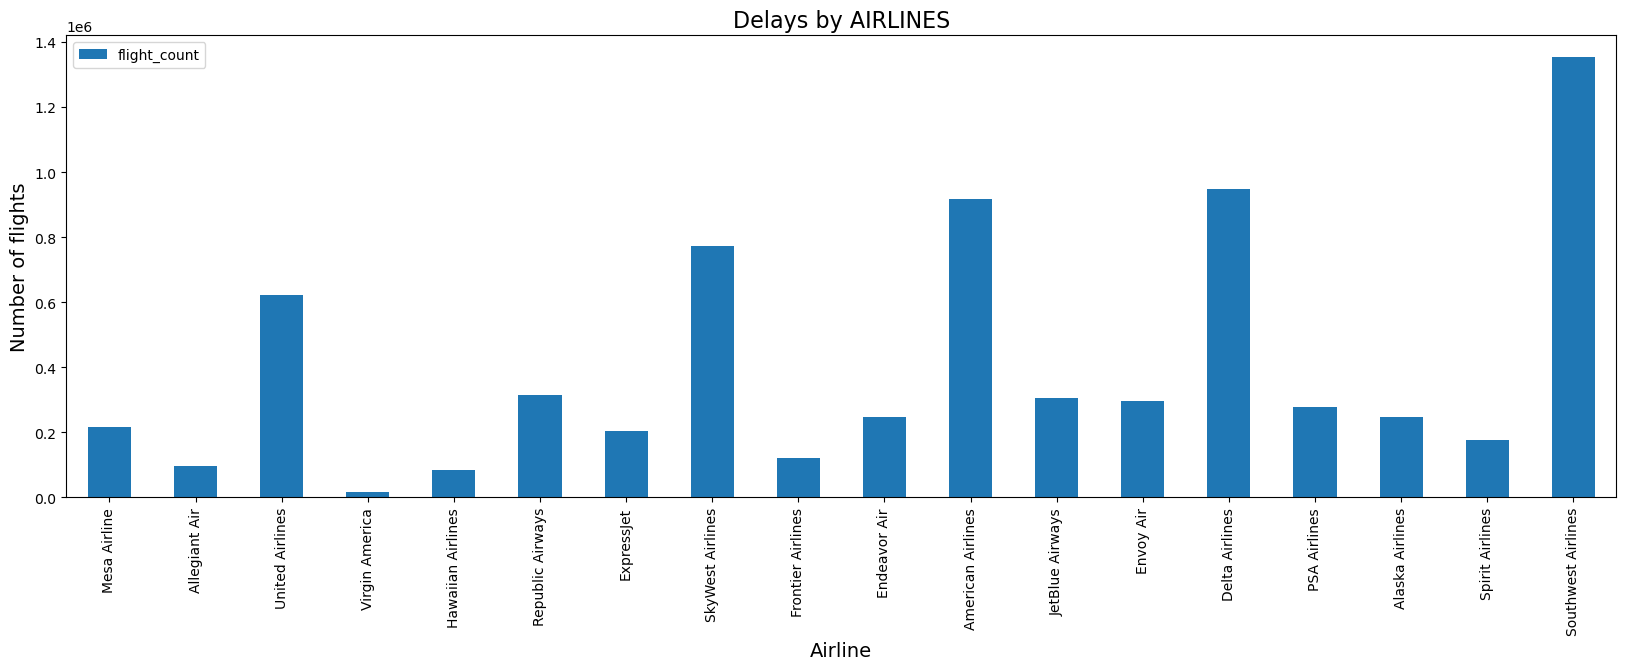

In [45]:
import pandas as pd
import pyspark.sql.functions as F


# group by airline and count the number of flights
flight_counts = df.groupBy('OP_CARRIER').agg(F.count('*').alias('flight_count'))

# convert the PySpark DataFrame to a Pandas DataFrame
flight_counts_pd = flight_counts.toPandas()

# generate the bar plot using Pandas' plot method
flight_counts_pd.plot.bar(x='OP_CARRIER', y='flight_count', figsize=(20,6))
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of flights', fontsize=14)
plt.show()

In [46]:
from pyspark.sql.functions import year
from pyspark.sql.functions import month
from pyspark.sql.functions import dayofweek

In [47]:
delay=delay.withColumn('FL_YEAR',year(delay.FL_DATE))
delay=delay.withColumn('FL_MONTH',month(delay.FL_DATE))
delay=delay.withColumn('FL_DAYOFWEEK',dayofweek(delay.FL_DATE))

In [48]:
#Extract day of week and month
df=df.withColumn('FL_DAYOFWEEK',dayofweek(df.FL_DATE))
df=df.withColumn('FL_MONTH',month(df.FL_DATE))

#Cast to double
df=df.withColumn("FL_MONTH",col("FL_MONTH").cast('double'))
df=df.withColumn("FL_DAYOFWEEK",col("FL_DAYOFWEEK").cast('double'))

In [49]:
df.printSchema()

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- FL_DAYOFWEEK: double (nullable = true)
 |-- FL_MONTH: double (nullable = true)



# Spark SQL

In [50]:
df.createOrReplaceTempView("df")

### Number Of Flights Cancelled in Each Month from 2018.

In [51]:
spark.sql("""
 SELECT FL_MONTH, COUNT(CANCELLED) AS TOTAL_CANCELLED
 FROM df
 WHERE CANCELLED = 1
 GROUP BY FL_MONTH
 ORDER BY FL_MONTH
 LIMIT 50
""").show()


+--------+---------------+
|FL_MONTH|TOTAL_CANCELLED|
+--------+---------------+
|     1.0|          17169|
|     2.0|           8976|
|     3.0|          17280|
|     4.0|           6251|
|     5.0|           7155|
|     6.0|          10694|
|     7.0|          11083|
|     8.0|          12353|
|     9.0|           8132|
|    10.0|           4485|
|    11.0|           6254|
|    12.0|           6752|
+--------+---------------+



### Number Of Flights Detoured in Each Month in 2018

In [52]:
spark.sql("""
 SELECT origin, COUNT(cancelled), op_carrier
 FROM df where cancelled = 1
 GROUP BY origin, op_carrier
""").show()

+------+----------------+-----------------+
|origin|count(cancelled)|       op_carrier|
+------+----------------+-----------------+
|   SLC|              16|     Mesa Airline|
|   PWM|              62|       ExpressJet|
|   TOL|              14| SkyWest Airlines|
|   HNL|              15|American Airlines|
|   ROW|               1|     Mesa Airline|
|   MIA|              39|Frontier Airlines|
|   MYR|              15|   Delta Airlines|
|   BTR|              77|       ExpressJet|
|   CMH|              20|     Mesa Airline|
|   GSP|              11|   Delta Airlines|
|   EUG|              12| SkyWest Airlines|
|   PIT|              30|     Mesa Airline|
|   AUS|              13| Republic Airways|
|   FAR|               8|       ExpressJet|
|   EVV|               7| SkyWest Airlines|
|   GSO|              66|       ExpressJet|
|   CLT|              55| SkyWest Airlines|
|   GGG|              29|        Envoy Air|
|   DEN|             199|Frontier Airlines|
|   MKG|              39| SkyWes

### Most cancelled flight 

In [53]:
spark.sql(""" SELECT op_carrier, COUNT(cancelled) AS Total
FROM df where cancelled = 1
GROUP BY cancelled, op_carrier
ORDER BY Total desc
LIMIT 10
""").show()

+------------------+-----+
|        op_carrier|Total|
+------------------+-----+
|Southwest Airlines|18275|
| American Airlines|14945|
|      PSA Airlines|11870|
|         Envoy Air|10655|
|  SkyWest Airlines|10610|
|  Republic Airways|10100|
|   JetBlue Airways| 6419|
|      Endeavor Air| 6355|
|        ExpressJet| 5670|
|      Mesa Airline| 5530|
+------------------+-----+



### No. Of Flights canceled from origin city by airline fights in each year i.e.,2018.

In [54]:
spark.sql("""
 SELECT origin, COUNT(cancelled), op_carrier
 FROM df where cancelled = 1
 GROUP BY origin, op_carrier
""").show()

+------+----------------+-----------------+
|origin|count(cancelled)|       op_carrier|
+------+----------------+-----------------+
|   SLC|              16|     Mesa Airline|
|   PWM|              62|       ExpressJet|
|   TOL|              14| SkyWest Airlines|
|   HNL|              15|American Airlines|
|   ROW|               1|     Mesa Airline|
|   MIA|              39|Frontier Airlines|
|   MYR|              15|   Delta Airlines|
|   BTR|              77|       ExpressJet|
|   CMH|              20|     Mesa Airline|
|   GSP|              11|   Delta Airlines|
|   EUG|              12| SkyWest Airlines|
|   PIT|              30|     Mesa Airline|
|   AUS|              13| Republic Airways|
|   FAR|               8|       ExpressJet|
|   EVV|               7| SkyWest Airlines|
|   GSO|              66|       ExpressJet|
|   CLT|              55| SkyWest Airlines|
|   GGG|              29|        Envoy Air|
|   DEN|             199|Frontier Airlines|
|   MKG|              39| SkyWes

### Flight has least amount of delay(planed departure = actual departure)

In [55]:
spark.sql("""SELECT OP_CARRIER_FL_NUM, MIN(abs(CRS_DEP_TIME - DEP_DELAY)) AS min_delay
FROM df 
GROUP BY OP_CARRIER_FL_NUM
ORDER BY min_delay ASC
LIMIT 1
""").show()

+-----------------+------------------+
|OP_CARRIER_FL_NUM|         min_delay|
+-----------------+------------------+
|             1664|0.1333333333333333|
+-----------------+------------------+



### Airport has high delay(busy) most of the time

In [56]:
spark.sql("""SELECT origin, AVG(dep_delay) AS avg_delay
FROM df
WHERE dep_delay > 0
GROUP BY origin
ORDER BY avg_delay DESC
LIMIT 1
""").show()

+------+------------------+
|origin|         avg_delay|
+------+------------------+
|   DVL|2.3069841269841267|
+------+------------------+



### Airports having least amount of wheels off time (operations and management is good)

In [57]:
spark.sql("""SELECT origin, avg(abs(wheels_off - DEP_TIME)) AS avg_wo_time
FROM df
GROUP BY origin
ORDER BY avg_wo_time ASC
LIMIT 10
""").show()

+------+------------------+
|origin|       avg_wo_time|
+------+------------------+
|   OWB|11.046728971962617|
|   SMX|12.064705882352941|
|   OTZ|12.238095238095237|
|   OME|12.361794500723589|
|   HYA|12.511363636363637|
|   BKG|12.956521739130435|
|   YAK|13.530898876404494|
|   OGD|            13.744|
|   BRW|13.880952380952381|
|   LWS| 14.12290502793296|
+------+------------------+



### Airports having high amount of wheels off time (operations and management is bad)

In [58]:
spark.sql("""SELECT origin, avg(abs(wheels_off - DEP_TIME)) AS avg_wo_time
FROM df
GROUP BY origin
ORDER BY avg_wo_time desc
LIMIT 10
""").show()

+------+------------------+
|origin|       avg_wo_time|
+------+------------------+
|   PPG|208.65573770491804|
|   JMS| 78.96924708377519|
|   FAI| 74.44431869624265|
|   SFO| 64.54136955030467|
|   LAX| 64.39248391459367|
|   JFK| 61.90717272842479|
|   YNG|              58.5|
|   ANC| 57.92597246503497|
|   UIN|   49.270207852194|
|   LGA| 48.57906184693933|
+------+------------------+



### Most appropriate time to reach at airport for travelers 

In [59]:
spark.sql(""" select sum(abs(CRS_DEP_TIME - DEP_TIME))/count(DEP_TIME) as REACH_TIME from df""").show()

+------------------+
|        REACH_TIME|
+------------------+
|34.781221267773056|
+------------------+



# Feature Transformation

In [60]:
bd1 = delay.withColumn('Delayed', (delay.ARR_DELAY >=10).cast('int'))

It adds a new column to the DataFrame named 'Delayed'. The value of the 'Delayed' column is calculated based on the value of the 'ARR_DELAY' column in each row.

If the 'ARR_DELAY' value is greater than or equal to 10 minutes, then the 'Delayed' value will be set to 1 (cast as an integer). Otherwise, if the 'ARR_DELAY' value is less than 10 minutes, then the 'Delayed' value will be set to 0 (cast as an integer).

In other words, this code is identifying flights that experienced a delay of 10 minutes or more and flagging them with a value of 1 in the 'Delayed' column. This can be useful for further analysis or modeling purposes, as delayed flights may be of particular interest or concern.

The cast('int') function call is necessary because the >= operator returns a boolean value (True or False). The cast() function is used to convert this boolean value to an integer (1 or 0) that can be stored in the 'Delayed' column.

In [61]:
bd1.select('Delayed').distinct().show() # Delayed flights

+-------+
|Delayed|
+-------+
|      1|
|      0|
+-------+



In [62]:
bd1.createOrReplaceTempView("bd1")

# The createOrReplaceTempView() function is a PySpark DataFrame API function 
# that creates or replaces a temporary view with the specified name in Spark's SQL engine.

In [63]:
bd1 = spark.sql("select *, case \
               when DEP_TIME <= 800 then 1 \
               when 800 < DEP_TIME and DEP_TIME <= 1200 then 2 \
               when 1200 < DEP_TIME and DEP_TIME <= 1600 then 3 \
               when 1600 < DEP_TIME and DEP_TIME <= 2100 then 4 \
               else 1 end as TimeSlot \
               from bd1")

The query adds a new column to the bd1 DataFrame named 'TimeSlot'. The value of the 'TimeSlot' column is determined based on the value of the 'DEP_TIME' column in each row.

The CASE statement in the SQL query is used to map each departure time to a time slot. If the departure time is before or equal to 8:00 AM (800 hours), it is assigned a time slot of 1. If the departure time is between 8:00 AM and 12:00 PM (1200 hours), it is assigned a time slot of 2. If the departure time is between 12:00 PM and 4:00 PM (1600 hours), it is assigned a time slot of 3. If the departure time is between 4:00 PM and 9:00 PM (2100 hours), it is assigned a time slot of 4.


If the departure time falls outside of these time ranges (i.e., if it is after 9:00 PM), it is assigned a time slot of 1 again.

Creating a new categorical variable that can be used to group flights by time of day. This can be useful for further analysis or modeling purposes, as flights that depart at different times of day may have different characteristics or behavior patterns

In [64]:
from pyspark.ml.feature import StringIndexer

##### The StringIndexer class is a feature transformer in PySpark that can be used to convert categorical string columns to numerical indices. It assigns a unique index to each distinct value in a given column, with the most frequent value receiving index 0.

In [65]:

indexer1 = StringIndexer(inputCol='OP_CARRIER',outputCol='INDEX_CARRIER') 
bd2=indexer1.fit(bd1).transform(bd1)

indexer2 = StringIndexer(inputCol='ORIGIN',outputCol='INDEX_ORIGIN') 
bd3=indexer2.fit(bd2).transform(bd2)

bd3.groupBy('OP_CARRIER','INDEX_CARRIER').count().sort('INDEX_CARRIER').show()

+------------------+-------------+------+
|        OP_CARRIER|INDEX_CARRIER| count|
+------------------+-------------+------+
|Southwest Airlines|          0.0|513106|
| American Airlines|          1.0|336974|
|  SkyWest Airlines|          2.0|265057|
|    Delta Airlines|          3.0|261185|
|   United Airlines|          4.0|214528|
|   JetBlue Airways|          5.0|126936|
|      PSA Airlines|          6.0|106844|
|         Envoy Air|          7.0|105492|
|  Republic Airways|          8.0|100386|
|   Alaska Airlines|          9.0| 84597|
|      Mesa Airline|         10.0| 79640|
|      Endeavor Air|         11.0| 73316|
|        ExpressJet|         12.0| 68244|
|   Spirit Airlines|         13.0| 56368|
| Frontier Airlines|         14.0| 52413|
|     Allegiant Air|         15.0| 37177|
| Hawaiian Airlines|         16.0| 27449|
|    Virgin America|         17.0|  6338|
+------------------+-------------+------+



Creating a StringIndexer instance named indexer1 with inputCol='OP_CARRIER' and outputCol='INDEX_CARRIER'.

Applying the indexer1 estimator to the bd1 DataFrame using the fit() and transform() methods to create a new DataFrame named bd2 with an additional column named 'INDEX_CARRIER'. This column contains numerical indices corresponding to the distinct values in the 'OP_CARRIER' column.

Creating another StringIndexer instance named indexer2 with inputCol='ORIGIN' and outputCol='INDEX_ORIGIN'.

Applying the indexer2 estimator to the bd2 DataFrame using the fit() and transform() methods to create a new DataFrame named bd3 with an additional column named 'INDEX_ORIGIN'. This column contains numerical indices corresponding to the distinct values in the 'ORIGIN' column.

Grouping the bd3 DataFrame by 'OP_CARRIER' and 'INDEX_CARRIER', counting the number of occurrences of each combination, and sorting the result by 'INDEX_CARRIER'.

In [66]:
from pyspark.sql.functions import *

delay.stat.corr('FL_DAYOFWEEK','ARR_DELAY')

-0.008709912602623097

The delay.stat.corr('FL_DAYOFWEEK','ARR_DELAY') code computes the Pearson correlation coefficient between the 'FL_DAYOFWEEK' column (which represents the day of the week of the flight) and the 'ARR_DELAY' column (which represents the arrival delay of the flight in minutes) in the delay DataFrame. 

The resulting value indicates the strength and direction of the linear relationship between these variables, with higher absolute values indicating stronger correlations.

# Feature Selection 

In [67]:
bd4=bd3.select('DEP_DELAY',
             'DISTANCE', 
             'FL_DAYOFWEEK',
             'INDEX_CARRIER', 
             'TimeSlot',
             'Delayed',
             'FL_MONTH',
             'ACTUAL_ELAPSED_TIME',
             'INDEX_ORIGIN')
             
bd4.limit(10).toPandas()

,DEP_DELAY,DISTANCE,FL_DAYOFWEEK,INDEX_CARRIER,TimeSlot,Delayed,FL_MONTH,ACTUAL_ELAPSED_TIME,INDEX_ORIGIN
0,20.0,723.0,2,4.0,1,1,1,106.0,0.0
1,121.0,316.0,2,4.0,1,1,1,80.0,0.0
2,76.0,763.0,2,4.0,1,1,1,118.0,0.0
3,54.0,2218.0,2,4.0,1,1,1,338.0,13.0
4,72.0,2500.0,2,4.0,4,1,1,339.0,11.0
5,47.0,1068.0,2,4.0,3,1,1,149.0,50.0
6,14.0,631.0,2,4.0,2,0,1,131.0,11.0
7,8.0,1874.0,2,4.0,3,1,1,262.0,146.0
8,48.0,1167.0,2,4.0,1,1,1,150.0,36.0
9,-3.0,1065.0,2,4.0,4,0,1,200.0,11.0


# Imputing Null values

In [68]:
null_values(bd4)

DEP_DELAY ----------- > 0.047574571252558574
DISTANCE ------------ > 0.0
FL_DAYOFWEEK -------- > 0.0
INDEX_CARRIER ------- > 0.0
TimeSlot ------------ > 0.0
Delayed ------------- > 0.0
FL_MONTH ------------ > 0.0
ACTUAL_ELAPSED_TIME - > 3.974483813914668e-05
INDEX_ORIGIN -------- > 0.0


In [69]:
from pyspark.ml.feature import Imputer


In [70]:
imputer = Imputer(
    inputCols = bd4.columns,
    outputCols = ["{}".format(a) for a in bd4.columns]
).setStrategy("median")

inputCols: a list of column names in the bd4 DataFrame that should be imputed. In this case, it includes all columns in bd4.

outputCols: a list of names for the output columns after imputation. In this case, it uses the same column names as the input columns.

setStrategy("median"): sets the imputation strategy to "median", which means that missing values will be replaced with the median value of each column.

In [71]:
b5=imputer.fit(bd4)

In [72]:
bd6=b5.transform(bd4)

# One Hot Encoding

In [73]:
from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(dropLast=False, inputCol="INDEX_ORIGIN", outputCol="VEC_ORIGIN")
bd7 = encoder.fit(bd6).transform(bd6)

# Independent and Dependent Variable Creation

In [74]:
from pyspark.ml.feature import VectorAssembler, StringIndexer  
from pyspark.sql.functions import col

VectorAssembler from the pyspark.ml.feature module: a feature transformer that combines a given list of columns into a single vector column. This is often used as a preprocessing step before applying machine learning algorithms to a DataFrame.

StringIndexer from the pyspark.ml.feature module: a feature transformer that indexes categorical columns, i.e., it assigns a unique numeric index to each distinct category in a column.

col from the pyspark.sql.functions module: a function that returns a Column based on the given column name. This is often used to select columns from a DataFrame or to reference columns in DataFrame transformations

In [75]:
a1 = VectorAssembler(  
inputCols=['DEP_DELAY',
             'DISTANCE', 
             'FL_DAYOFWEEK',
             'INDEX_CARRIER', 
             'TimeSlot',
             'FL_MONTH',
             'ACTUAL_ELAPSED_TIME',
             'INDEX_ORIGIN'], 
outputCol='features')

In [76]:
bd8 = a1.transform(bd7).select(col("Delayed").alias("label"),'features')  
bd9 = bd8.select('label','features')

In [77]:
bd9.select('features').show(10,False)

+----------------------------------------+
|features                                |
+----------------------------------------+
|[20.0,723.0,2.0,4.0,1.0,1.0,106.0,0.0]  |
|[121.0,316.0,2.0,4.0,1.0,1.0,80.0,0.0]  |
|[76.0,763.0,2.0,4.0,1.0,1.0,118.0,0.0]  |
|[54.0,2218.0,2.0,4.0,1.0,1.0,338.0,13.0]|
|[72.0,2500.0,2.0,4.0,4.0,1.0,339.0,11.0]|
|[47.0,1068.0,2.0,4.0,3.0,1.0,149.0,50.0]|
|[14.0,631.0,2.0,4.0,2.0,1.0,131.0,11.0] |
|[8.0,1874.0,2.0,4.0,3.0,1.0,262.0,146.0]|
|[48.0,1167.0,2.0,4.0,1.0,1.0,150.0,36.0]|
|[-3.0,1065.0,2.0,4.0,4.0,1.0,200.0,11.0]|
+----------------------------------------+
only showing top 10 rows



It prints the first 10 rows using the show() method.

By default, show() only prints the first 20 rows of a DataFrame, so setting False as the second parameter to show() ensures that all columns are displayed without truncation.

# Training and Testing Data split

In [78]:
train, test = bd9.randomSplit([0.8, 0.2], seed = 123)

print("Train Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Train Dataset Count: 2014288
Test Dataset Count: 501762


weights: a list of weights for each split. In this case, the list is [0.8, 0.2], which means that 80% of the data will be assigned to the training set and 20% of the data will be assigned to the test set.

seed: an optional seed value for the random number generator used to split the data. In this case, the seed is set to 123, which means that the same random split will be generated every time this code is run with the same data.

In [79]:
train.show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[-28.0,82.0,4.0,9...|
|    0|[-27.0,213.0,1.0,...|
|    0|[-25.0,680.0,7.0,...|
|    0|[-25.0,1866.0,1.0...|
|    0|[-24.0,160.0,4.0,...|
+-----+--------------------+
only showing top 5 rows



In [80]:
test.show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[-27.0,253.0,3.0,...|
|    0|[-24.0,419.0,7.0,...|
|    0|[-21.0,2562.0,6.0...|
|    0|[-20.0,66.0,7.0,2...|
|    0|[-20.0,859.0,4.0,...|
+-----+--------------------+
only showing top 5 rows



# Logistic Regression

In [81]:
from pyspark.ml.classification import LogisticRegression

In [82]:
lr=LogisticRegression (featuresCol = 'features', labelCol ='label', maxIter=5)
lrModel=lr.fit(train)

featuresCol: the name of the column that contains the input features for the model. In this case, it is set to 'features', which is the name of the vector column that was created using PySpark's VectorAssembler feature transformer.

labelCol: the name of the column that contains the labels for the model. In this case, it is set to 'label', which is the name of the column that was created earlier using PySpark's withColumn() method.

maxIter: the maximum number of iterations to run the logistic regression algorithm. In this case, it is set to 5.

In [83]:
pred_lr=lrModel.transform(test)
pred_lr.select('label', 'prediction', 'probability').show(5, False)

+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0    |0.0       |[0.9642826333470051,0.03571736665299485]|
|0    |0.0       |[0.8768668092980569,0.12313319070194306]|
|0    |0.0       |[0.8538993879976329,0.14610061200236713]|
|0    |0.0       |[0.9069910058927615,0.09300899410723851]|
|0    |0.0       |[0.8924654782090006,0.10753452179099943]|
+-----+----------+----------------------------------------+
only showing top 5 rows



In [84]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [85]:
# Let's use the run-of-the-mill evaluator
evaluator = BinaryClassificationEvaluator(labelCol='label')
auroc_lr = evaluator.evaluate(pred_lr, {evaluator.metricName: "areaUnderROC"})
print("Area under ROC Curve (Logistic Regression model): {:.4f}".format(auroc_lr))

Area under ROC Curve (Logistic Regression model): 0.8815


In [86]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
auc = evaluator.evaluate(pred_lr)
print("Area Under ROC Curve (AUC) = %g" % auc)

Area Under ROC Curve (AUC) = 0.881474


In [87]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

f1_score = evaluator.evaluate(pred_lr)
print("F1 score:", f1_score)

F1 score: 0.7913042266297193


In [88]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

f1_score = evaluator.evaluate(pred_lr)
print("F1 score:", f1_score)


F1 score: 0.764490007144478


# DecisionTreeClassifier

In [89]:
from pyspark.ml.classification import DecisionTreeClassifier

tree = DecisionTreeClassifier(labelCol="label",featuresCol="features",maxDepth=5,maxBins=32)
tree_model = tree.fit(train)


In [90]:
# Create predictions on test data
pred_dt= tree_model.transform(test)
pred_dt.select('label', 'prediction', 'probability').show(5, False)

+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0    |0.0       |[0.761279430804406,0.2387205691955941]  |
|0    |0.0       |[0.6698861243099843,0.33011387569001577]|
|0    |0.0       |[0.5110187889980579,0.48898121100194214]|
|0    |0.0       |[0.761279430804406,0.2387205691955941]  |
|0    |0.0       |[0.6698861243099843,0.33011387569001577]|
+-----+----------+----------------------------------------+
only showing top 5 rows



In [91]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Let's use the run-of-the-mill evaluator
evaluator = BinaryClassificationEvaluator(labelCol='label')
auroc_dt = evaluator.evaluate(pred_dt, {evaluator.metricName: "areaUnderROC"})
print("Area under ROC Curve (Decision Tree Classifier Regression model): {:.4f}".format(auroc_dt))

Area under ROC Curve (Decision Tree Classifier Regression model): 0.7777


In [92]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

f1_score = evaluator.evaluate(pred_dt)
print("F1 score:", f1_score)

F1 score: 0.782292963182062


# Gradient Boosting


In [93]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [94]:
gbt = GBTClassifier()

In [95]:
param_grid = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [2, 4, 6]) \
    .addGrid(gbt.maxBins, [20, 30, 40]) \
    .addGrid(gbt.maxIter, [10, 20, 30]) \
    .build()

In [96]:
evaluator = BinaryClassificationEvaluator()
cv = CrossValidator(estimator=gbt, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=5)
cv_model = cv.fit(train)

In [97]:
predictions_gbt = cv_model.transform(test)

In [98]:
accuracy = evaluator.evaluate(predictions_gbt)
print('Accuracy:', accuracy)

Accuracy: 0.9155762309847115


In [99]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

f1_score = evaluator.evaluate(predictions_gbt)
print("F1 score:", f1_score)

F1 score: 0.8215611660892628


# Random Forest Classifier

In [100]:
!pip install --upgrade pyspark

In [101]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [102]:
rf = RandomForestClassifier(numTrees=10, maxDepth=5, labelCol="label", seed=1)
model = rf.fit(train)

In [103]:
predictions_rf = model.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_rf)
print("Accuracy = " + str(accuracy))

Accuracy = 0.7761050059590004


In [104]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

f1_score = evaluator.evaluate(predictions_rf)
print("F1 score:", f1_score)

F1 score: 0.7809550319043885


# SVM

In [105]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lsvc = LinearSVC(maxIter=10, regParam=0.1)
model = lsvc.fit(train)


In [106]:
# Make predictions on the test data
predictions_svm = model.transform(test)

In [107]:
# Evaluate the model using the MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
accuracy = evaluator.evaluate(predictions_svm)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))



Accuracy = 0.516228
Test Error = 0.483772


In [108]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

f1_score = evaluator.evaluate(predictions_svm)
print("F1 score:", f1_score)

F1 score: 0.5
